## TAD

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from my_functions import *

In [4]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

### Lectura de datos

In [5]:
path = '../data/Fraud/fraudTrain.csv'
df = pd.read_csv( path )
df.shape

(1296675, 23)

In [6]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
641358,641358,2019-09-29 22:55:43,30150717898388,fraud_Marvin-Lind,personal_care,32.5000,Raymond,Lloyd,M,5930 Rebecca Bridge Apt. 444,Paint Rock,AL,35764,34.7031,-86.3068,653,Paediatric nurse,1966-06-19,9e7e39813cd4013f3e665d10bdf03f9d,1348959343,35.2305,-85.6552,0
1129040,1129040,2020-04-14 19:32:01,30518206766474,fraud_Lesch Ltd,shopping_pos,1.6800,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,919ee9567a5d5feaee6fdd573da55717,1365967921,36.1077,-90.5530,0
653690,653690,2019-10-05 19:43:36,213141712584544,fraud_Gleason and Sons,kids_pets,8.6200,Margaret,Curtis,F,742 Oneill Shore,Florence,MS,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,3056c157c08f780527a9528a400fc3cd,1349466216,33.1497,-89.2105,0
798532,798532,2019-12-03 19:33:05,4265776278887457,fraud_Eichmann-Kilback,home,26.0900,Christine,Best,F,68248 Deanna Land,Enola,AR,72047,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,abe459c1b33d4a5e33bf050369ac1b78,1354563185,34.8961,-92.9707,0
673068,673068,2019-10-13 22:19:17,180018375329178,fraud_Barrows PLC,shopping_pos,5.2100,Michelle,Woods,F,952 Joseph Throughway,Munith,MI,49259,42.3703,-84.2485,2523,Geophysicist/field seismologist,1988-03-21,baf00077d9e56b4490dff4d6c152681f,1350166757,41.7204,-83.9142,0


__Diccionario de datos__

* index - Unique Identifier for each row
* transdatetrans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

### Problema / Resumen

* Construir una TAD para resolver la problematica de identificar a traves de un modelo si la transacción es hecha por una persona "adulta mayor" (Considerar a partir de 50 años)

## Exploración / Inspección / Limpieza (EDA)

In [7]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['zip'] = df['zip'].map( lambda z: str(z) if len(str(z)) == 5 else '0' + str(z) )
df['cc_num'] = df['cc_num'].astype(str)

In [8]:
df['amt'].describe(percentiles=np.arange(0.1, 1.01, 0.1))

count   1296675.0000
mean         70.3510
std         160.3160
min           1.0000
10%           4.1100
20%           7.7500
30%          15.7400
40%          32.1300
50%          47.5200
60%          60.9400
70%          75.0300
80%          94.6800
90%         136.6700
100%      28948.9000
max       28948.9000
Name: amt, dtype: float64

In [9]:
df.describe()

,index,trans_date_trans_time,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0000,1296675,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675,1296675.0000,1296675.0000,1296675.0000,1296675.0000
mean,648337.0000,2019-10-03 12:47:28.070214144,70.3510,38.5376,-90.2263,88824.4406,1973-10-03 19:02:55.017178512,1349243636.7261,38.5373,-90.2265,0.0058
min,0.0000,2019-01-01 00:00:18,1.0000,20.0271,-165.6723,23.0000,1924-10-30 00:00:00,1325376018.0000,19.0278,-166.6712,0.0000
25%,324168.5000,2019-06-03 19:12:22.500000,9.6500,34.6205,-96.7980,743.0000,1962-08-13 00:00:00,1338750742.5000,34.7336,-96.8973,0.0000
50%,648337.0000,2019-10-03 07:35:47,47.5200,39.3543,-87.4769,2456.0000,1975-11-30 00:00:00,1349249747.0000,39.3657,-87.4384,0.0000
75%,972505.5000,2020-01-28 15:02:55.500000,83.1400,41.9404,-80.1580,20328.0000,1987-02-22 00:00:00,1359385375.5000,41.9572,-80.2368,0.0000
max,1296674.0000,2020-06-21 12:13:37,28948.9000,66.6933,-67.9503,2906700.0000,2005-01-29 00:00:00,1371816817.0000,67.5103,-66.9509,1.0000
std,374317.9745,NaN,160.3160,5.0758,13.7591,301956.3607,NaN,12841278.4234,5.1098,13.7711,0.0759


## Ingenieria de Variables

In [10]:
df.dtypes

index                             int64
trans_date_trans_time    datetime64[ns]
cc_num                           object
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                              object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [11]:
df['hour_str'] = df['trans_date_trans_time'].map( lambda x: x.strftime('%H') )
df['week_day'] = df['trans_date_trans_time'].map( lambda x: x.weekday() )
df['day'] = df['trans_date_trans_time'].map( lambda x: x.day )
df['month'] = df['trans_date_trans_time'].map( lambda x: x.month )
df['year'] = df['trans_date_trans_time'].map( lambda x: x.year )
df['week_day_str'] = df['week_day'].map( dict( zip( range(0, 7, 1), 'LMXJVSD' ) ) )
df['age'] = ( (df['trans_date_trans_time'] - df['dob']) / np.timedelta64(364, 'D') ).astype(int)
df['franja_hr'] = df['hour_str'].map( lambda hr: franjas_hrs( int( hr ) ) )
df['count'] = df[['cc_num', 'trans_date_trans_time']].sort_values(['cc_num', 'trans_date_trans_time']).groupby(['cc_num']).cumcount()
df['hour_int'] = df['trans_date_trans_time'].map( lambda x: x.strftime('%H') ).astype(int)

In [12]:
# Definimos la target
df['y_adult'] = np.where( df['age']>50, 1, 0 )

# Calculo de la distancia entre las coordenadas 
df['distance'] = df.apply( 
    lambda row: 
        haversine( 
            lon1=row['long'], 
            lat1=row['lat'], 
            lon2=row['merch_long'], 
            lat2=row['merch_lat'] 
        ), 
    axis=1 )

# Ratio entre el monto de la transaccion y el numero de la transaccion, si es la transaccion 1, se coloca 0
df['ratio_amt_trans_count'] = df.apply( lambda row: 0 if row['count'] == 0 else row['amt']/row['count'], axis=1)

# Ratio entre el monto de la transaccion el la hora de la transaccion, si la hora es 0, se coloca 0
df['ratio_amt_hr_trans'] = df.apply( lambda row: 0 if row['hour_int'] == 0 else row['amt']/row['hour_int'], axis=1 )

In [13]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_str,age,franja_hr,count,hour_int,y_adult,distance,ratio_amt_trans_count,ratio_amt_hr_trans
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0,0,0,78.5976,0.0000,0.0000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0,0,0,30.2122,0.0000,0.0000
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0,0,1,108.2061,0.0000,0.0000
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,00,1,1,1,2019,M,52,madrugada,0,0,1,95.6732,0.0000,0.0000
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,00,1,1,1,2019,M,32,madrugada,0,0,0,77.5567,0.0000,0.0000


## Variables / Definiciones

In [14]:
df.columns.to_frame()

,0
index,index
trans_date_trans_time,trans_date_trans_time
cc_num,cc_num
merchant,merchant
category,category
amt,amt
first,first
last,last
gender,gender
street,street


In [15]:
len(df.columns.to_list())

37

In [16]:
# Unidad muestral
um = ['index']

# Target
target = ['y_adult']

# Variables Discretas / Categoricas
var_disc = ['cc_num','merchant','category','first','last','gender','street','city','state','zip','job',
        'trans_num','hour_str', 'day', 'month', 'year', 'week_day_str', 'franja_hr' ]

# Variables continuas / numericas
var_cont = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long', 'week_day', 
            'count', 'ratio_amt_hr_trans', 'ratio_amt_trans_count', 'distance' ]

# Fechas
var_fh = ['trans_date_trans_time','dob']

# Variables Fuera
var_fuera = ['age', 'is_fraud', 'hour_int']

In [17]:
len( um + target + var_disc + var_cont + var_fh + var_fuera )

37

In [18]:
# Convertir a numeros
for col in var_cont:
    df[col] = pd.to_numeric( df[col], errors='coerce')

# Convertir a string
for col in var_disc:
    df[col] = df[col].astype(str)

## Análisis Exploratorio

### Discreto / Categórico

#### Frecuencias

In [19]:
def freq(df, var):
    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

In [20]:
freq(df, var=var_disc)

La variable: cc_num


,FA,FR,FAA,FRA
cc_num,,,,
571365235126,3123,0.0024,3123,0.0024
4512828414983801773,3123,0.0024,6246,0.0048
36722699017270,3119,0.0024,9365,0.0072
213112402583773,3117,0.0024,12482,0.0096
3545109339866548,3113,0.0024,15595,0.0120
...,...,...,...,...
180097223252063,7,0.0000,1296647,1.0000
4225628813173670,7,0.0000,1296654,1.0000
501894933032,7,0.0000,1296661,1.0000




La variable: merchant


,FA,FR,FAA,FRA
merchant,,,,
fraud_Kilback LLC,4403,0.0034,4403,0.0034
fraud_Cormier LLC,3649,0.0028,8052,0.0062
fraud_Schumm PLC,3634,0.0028,11686,0.0090
fraud_Kuhn LLC,3510,0.0027,15196,0.0117
fraud_Boyer PLC,3493,0.0027,18689,0.0144
...,...,...,...,...
"fraud_Douglas, DuBuque and McKenzie",775,0.0006,1293661,0.9977
fraud_Treutel-King,775,0.0006,1294436,0.9983
"fraud_Medhurst, Labadie and Gottlieb",759,0.0006,1295195,0.9989




La variable: category


,FA,FR,FAA,FRA
category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: first


,FA,FR,FAA,FRA
first,,,,
Christopher,26669,0.0206,26669,0.0206
Robert,21667,0.0167,48336,0.0373
Jessica,20581,0.0159,68917,0.0531
James,20039,0.0155,88956,0.0686
Michael,20009,0.0154,108965,0.0840
...,...,...,...,...
Cameron,9,0.0000,1296645,1.0000
Phyllis,8,0.0000,1296653,1.0000
Molly,8,0.0000,1296661,1.0000




La variable: last


,FA,FR,FAA,FRA
last,,,,
Smith,28794,0.0222,28794,0.0222
Williams,23605,0.0182,52399,0.0404
Davis,21910,0.0169,74309,0.0573
Johnson,20034,0.0155,94343,0.0728
Rodriguez,17394,0.0134,111737,0.0862
...,...,...,...,...
Wells,9,0.0000,1296644,1.0000
Peterson,9,0.0000,1296653,1.0000
Strong,8,0.0000,1296661,1.0000




La variable: gender


,FA,FR,FAA,FRA
gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: street


,FA,FR,FAA,FRA
street,,,,
0069 Robin Brooks Apt. 695,3123,0.0024,3123,0.0024
864 Reynolds Plains,3123,0.0024,6246,0.0048
8172 Robertson Parkways Suite 072,3119,0.0024,9365,0.0072
4664 Sanchez Common Suite 930,3117,0.0024,12482,0.0096
8030 Beck Motorway,3113,0.0024,15595,0.0120
...,...,...,...,...
7281 Joshua Mills Apt. 077,7,0.0000,1296647,1.0000
3307 Ferguson Way,7,0.0000,1296654,1.0000
9599 Washington Field Suite 238,7,0.0000,1296661,1.0000




La variable: city


,FA,FR,FAA,FRA
city,,,,
Birmingham,5617,0.0043,5617,0.0043
San Antonio,5130,0.0040,10747,0.0083
Utica,5105,0.0039,15852,0.0122
Phoenix,5075,0.0039,20927,0.0161
Meridian,5060,0.0039,25987,0.0200
...,...,...,...,...
Vacaville,7,0.0000,1296647,1.0000
Claypool,7,0.0000,1296654,1.0000
Karns City,7,0.0000,1296661,1.0000




La variable: state


,FA,FR,FAA,FRA
state,,,,
TX,94876,0.0732,94876,0.0732
NY,83501,0.0644,178377,0.1376
PA,79847,0.0616,258224,0.1991
CA,56360,0.0435,314584,0.2426
OH,46480,0.0358,361064,0.2785
MI,46154,0.0356,407218,0.3140
IL,43252,0.0334,450470,0.3474
FL,42671,0.0329,493141,0.3803
AL,40989,0.0316,534130,0.4119




La variable: zip


,FA,FR,FAA,FRA
zip,,,,
73754,3646,0.0028,3646,0.0028
34112,3613,0.0028,7259,0.0056
48088,3597,0.0028,10856,0.0084
82514,3527,0.0027,14383,0.0111
49628,3123,0.0024,17506,0.0135
...,...,...,...,...
46510,7,0.0000,1296647,1.0000
16041,7,0.0000,1296654,1.0000
38915,7,0.0000,1296661,1.0000




La variable: job


,FA,FR,FAA,FRA
job,,,,
Film/video editor,9779,0.0075,9779,0.0075
Exhibition designer,9199,0.0071,18978,0.0146
Naval architect,8684,0.0067,27662,0.0213
"Surveyor, land/geomatics",8680,0.0067,36342,0.0280
Materials engineer,8270,0.0064,44612,0.0344
...,...,...,...,...
Information officer,8,0.0000,1296646,1.0000
Veterinary surgeon,8,0.0000,1296654,1.0000
Ship broker,7,0.0000,1296661,1.0000




La variable: trans_num


,FA,FR,FAA,FRA
trans_num,,,,
0b242abb623afc578575680df30655b9,1,0.0000,1,0.0000
c85864e7e7cf0be6d1b8597977b8afea,1,0.0000,2,0.0000
1a8a2a05638a5503cc6bb8d5735efcc1,1,0.0000,3,0.0000
4556eaf1f7def06eb500325cde4d054e,1,0.0000,4,0.0000
5e915d9f88bd09cee9655a470d9bc0bd,1,0.0000,5,0.0000
...,...,...,...,...
2d1aa5b21a993788ac19b697598ca44c,1,0.0000,1296671,1.0000
b50dd4b47d1ad877874661afba6eb7f6,1,0.0000,1296672,1.0000
5ce4e974bf15b7d9f133c6eedb81ceb1,1,0.0000,1296673,1.0000




La variable: hour_str


,FA,FR,FAA,FRA
hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: day


,FA,FR,FAA,FRA
day,,,,
1,47089,0.0363,47089,0.0363
15,46213,0.0356,93302,0.0720
8,46201,0.0356,139503,0.1076
16,44894,0.0346,184397,0.1422
2,44748,0.0345,229145,0.1767
9,44685,0.0345,273830,0.2112
7,44239,0.0341,318069,0.2453
14,44015,0.0339,362084,0.2792
28,43470,0.0335,405554,0.3128




La variable: month


,FA,FR,FAA,FRA
month,,,,
5,146875,0.1133,146875,0.1133
6,143811,0.1109,290686,0.2242
3,143789,0.1109,434475,0.3351
12,141060,0.1088,575535,0.4439
4,134970,0.1041,710505,0.5479
1,104727,0.0808,815232,0.6287
2,97657,0.0753,912889,0.7040
8,87359,0.0674,1000248,0.7714
7,86596,0.0668,1086844,0.8382




La variable: year


,FA,FR,FAA,FRA
year,,,,
2019,924850,0.7132,924850,0.7132
2020,371825,0.2868,1296675,1.0000




La variable: week_day_str


,FA,FR,FAA,FRA
week_day_str,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: franja_hr


,FA,FR,FAA,FRA
franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000


#### Normalizar

In [21]:
def normalizar(df, v, umbral):
    #umbral = 0.03 # 0.05
    aux = df[v].value_counts(True).to_frame()
    aux[f"n_{v}"] = np.where( aux['proportion'] < umbral , 'CAT_PEQUE' ,aux.index )
    
    moda  = aux.head()[f'n_{v}'].values[0]
    
    if aux.loc[ aux[f'n_{v}'] == 'CAT_PEQUE' ]['proportion'].sum() < umbral:
        aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)
    
    aux.reset_index(inplace=True)

    return df.merge( aux , left_on=[v] , right_on=[v] , how='inner' ).drop('proportion',axis=1)

In [22]:
umbral = 0.03
for v in var_disc:
    print(f"Normalizando: {v}")
    df =  normalizar( df , v, umbral)

Normalizando: cc_num
Normalizando: merchant
Normalizando: category
Normalizando: first
Normalizando: last
Normalizando: gender
Normalizando: street
Normalizando: city
Normalizando: state
Normalizando: zip
Normalizando: job
Normalizando: trans_num
Normalizando: hour_str
Normalizando: day
Normalizando: month
Normalizando: year
Normalizando: week_day_str
Normalizando: franja_hr


In [23]:
var_norm = df.filter( like='n_' ).columns.tolist()
var_norm

['n_cc_num',
 'n_merchant',
 'n_category',
 'n_first',
 'n_last',
 'n_gender',
 'n_street',
 'n_city',
 'n_state',
 'n_zip',
 'n_job',
 'n_trans_num',
 'n_hour_str',
 'n_day',
 'n_month',
 'n_year',
 'n_week_day_str',
 'n_franja_hr']

In [24]:
freq( df, var_norm)

La variable: n_cc_num


,FA,FR,FAA,FRA
n_cc_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_merchant


,FA,FR,FAA,FRA
n_merchant,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_category


,FA,FR,FAA,FRA
n_category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: n_first


,FA,FR,FAA,FRA
n_first,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_last


,FA,FR,FAA,FRA
n_last,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_gender


,FA,FR,FAA,FRA
n_gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: n_street


,FA,FR,FAA,FRA
n_street,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_city


,FA,FR,FAA,FRA
n_city,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_state


,FA,FR,FAA,FRA
n_state,,,,
CAT_PEQUE,762545,0.5881,762545,0.5881
TX,94876,0.0732,857421,0.6612
NY,83501,0.0644,940922,0.7256
PA,79847,0.0616,1020769,0.7872
CA,56360,0.0435,1077129,0.8307
OH,46480,0.0358,1123609,0.8665
MI,46154,0.0356,1169763,0.9021
IL,43252,0.0334,1213015,0.9355
FL,42671,0.0329,1255686,0.9684




La variable: n_zip


,FA,FR,FAA,FRA
n_zip,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_job


,FA,FR,FAA,FRA
n_job,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_trans_num


,FA,FR,FAA,FRA
n_trans_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_hour_str


,FA,FR,FAA,FRA
n_hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: n_day


,FA,FR,FAA,FRA
n_day,,,,
1,71790,0.0554,71790,0.0554
15,46213,0.0356,118003,0.0910
8,46201,0.0356,164204,0.1266
16,44894,0.0346,209098,0.1613
2,44748,0.0345,253846,0.1958
9,44685,0.0345,298531,0.2302
7,44239,0.0341,342770,0.2643
14,44015,0.0339,386785,0.2983
28,43470,0.0335,430255,0.3318




La variable: n_month


,FA,FR,FAA,FRA
n_month,,,,
5,146875,0.1133,146875,0.1133
6,143811,0.1109,290686,0.2242
3,143789,0.1109,434475,0.3351
12,141060,0.1088,575535,0.4439
4,134970,0.1041,710505,0.5479
1,104727,0.0808,815232,0.6287
2,97657,0.0753,912889,0.7040
8,87359,0.0674,1000248,0.7714
7,86596,0.0668,1086844,0.8382




La variable: n_year


,FA,FR,FAA,FRA
n_year,,,,
2019,924850,0.7132,924850,0.7132
2020,371825,0.2868,1296675,1.0000




La variable: n_week_day_str


,FA,FR,FAA,FRA
n_week_day_str,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: n_franja_hr


,FA,FR,FAA,FRA
n_franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000


#### Unarias

In [25]:
# ariable categoricas que solo tienen una "categoria" o un valor unico
unarias = [v for v, cont in zip( var_norm, [ df[v].unique().shape[0] for v in var_norm ] ) if cont == 1]
unarias

['n_cc_num',
 'n_merchant',
 'n_first',
 'n_last',
 'n_street',
 'n_city',
 'n_zip',
 'n_job',
 'n_trans_num']

In [26]:
df[unarias].head(3)

,n_cc_num,n_merchant,n_first,n_last,n_street,n_city,n_zip,n_job,n_trans_num
0,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
1,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
2,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE


In [27]:
var_norm = [ _ for _ in var_norm if _ not in unarias]
var_norm

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_month',
 'n_year',
 'n_week_day_str',
 'n_franja_hr']

### Continuas / numericas

#### Discretizar

In [28]:
from sklearn.preprocessing import KBinsDiscretizer

In [29]:
var_disc

['cc_num',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'job',
 'trans_num',
 'hour_str',
 'day',
 'month',
 'year',
 'week_day_str',
 'franja_hr']

In [30]:
def discretizar(df_aux, v, k):
    
    kb = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile', subsample=None)
    df_aux = df_aux.copy()

    # Asegurar que no haya valores NaN antes de discretizar
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
    df_aux = df_aux.dropna(subset=[v])

    # Ajustar el discretizador
    kb.fit(df_aux[[v]])

    # Obtener los intervalos como strings usando pd.cut()
    bins = kb.bin_edges_[0]  # Extraer los límites de los bins
    df_aux[f'd_{v}_{k}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)

    return df_aux

In [31]:
for v in var_cont:
    for k in range(2, 6):
        # cuando k es mayor al número de valores únicos
        if df[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores únicos.")
            continue
        print(f"Para la variable {v}, con {k} bins.")
        df = discretizar(df, v, k)

Para la variable amt, con 2 bins.
Para la variable amt, con 3 bins.
Para la variable amt, con 4 bins.
Para la variable amt, con 5 bins.
Para la variable lat, con 2 bins.
Para la variable lat, con 3 bins.
Para la variable lat, con 4 bins.
Para la variable lat, con 5 bins.
Para la variable long, con 2 bins.
Para la variable long, con 3 bins.
Para la variable long, con 4 bins.
Para la variable long, con 5 bins.
Para la variable city_pop, con 2 bins.
Para la variable city_pop, con 3 bins.
Para la variable city_pop, con 4 bins.
Para la variable city_pop, con 5 bins.
Para la variable unix_time, con 2 bins.
Para la variable unix_time, con 3 bins.
Para la variable unix_time, con 4 bins.
Para la variable unix_time, con 5 bins.
Para la variable merch_lat, con 2 bins.
Para la variable merch_lat, con 3 bins.
Para la variable merch_lat, con 4 bins.
Para la variable merch_lat, con 5 bins.
Para la variable merch_long, con 2 bins.
Para la variable merch_long, con 3 bins.
Para la variable merch_long, c

In [32]:
vari = df.filter( like='d_' ).columns.tolist()
vari

['d_amt_2',
 'd_amt_3',
 'd_amt_4',
 'd_amt_5',
 'd_lat_2',
 'd_lat_3',
 'd_lat_4',
 'd_lat_5',
 'd_long_2',
 'd_long_3',
 'd_long_4',
 'd_long_5',
 'd_city_pop_2',
 'd_city_pop_3',
 'd_city_pop_4',
 'd_city_pop_5',
 'd_unix_time_2',
 'd_unix_time_3',
 'd_unix_time_4',
 'd_unix_time_5',
 'd_merch_lat_2',
 'd_merch_lat_3',
 'd_merch_lat_4',
 'd_merch_lat_5',
 'd_merch_long_2',
 'd_merch_long_3',
 'd_merch_long_4',
 'd_merch_long_5',
 'd_week_day_2',
 'd_week_day_3',
 'd_week_day_4',
 'd_week_day_5',
 'd_count_2',
 'd_count_3',
 'd_count_4',
 'd_count_5',
 'd_ratio_amt_hr_trans_2',
 'd_ratio_amt_hr_trans_3',
 'd_ratio_amt_hr_trans_4',
 'd_ratio_amt_hr_trans_5',
 'd_ratio_amt_trans_count_2',
 'd_ratio_amt_trans_count_3',
 'd_ratio_amt_trans_count_4',
 'd_ratio_amt_trans_count_5',
 'd_distance_2',
 'd_distance_3',
 'd_distance_4',
 'd_distance_5']

In [33]:
# Validación de proporción de los bines.
for v in vari:
    print(f"La variable: {v}")
    display(df[v].value_counts(True))
    print("\n")

La variable: d_amt_2


d_amt_2
(0.999, 47.52]     0.5001
(47.52, 28948.9]   0.4999
Name: proportion, dtype: float64



La variable: d_amt_3


d_amt_3
(0.999, 20.98]     0.3334
(20.98, 70.54]     0.3333
(70.54, 28948.9]   0.3333
Name: proportion, dtype: float64



La variable: d_amt_4


d_amt_4
(0.999, 9.65]      0.2501
(47.52, 83.14]     0.2500
(83.14, 28948.9]   0.2500
(9.65, 47.52]      0.2499
Name: proportion, dtype: float64



La variable: d_amt_5


d_amt_5
(0.999, 7.75]      0.2003
(60.94, 94.68]     0.2000
(94.68, 28948.9]   0.2000
(32.13, 60.94]     0.2000
(7.75, 32.13]      0.1998
Name: proportion, dtype: float64



La variable: d_lat_2


d_lat_2
(20.026, 39.354]   0.5005
(39.354, 66.693]   0.4995
Name: proportion, dtype: float64



La variable: d_lat_3


d_lat_3
(20.026, 36.499]   0.3345
(36.499, 41.044]   0.3329
(41.044, 66.693]   0.3325
Name: proportion, dtype: float64



La variable: d_lat_4


d_lat_4
(34.62, 39.354]   0.2505
(39.354, 41.94]   0.2500
(20.026, 34.62]   0.2500
(41.94, 66.693]   0.2495
Name: proportion, dtype: float64



La variable: d_lat_5


d_lat_5
(20.026, 33.906]   0.2017
(38.235, 40.497]   0.2013
(42.685, 66.693]   0.1997
(40.497, 42.685]   0.1989
(33.906, 38.235]   0.1984
Name: proportion, dtype: float64



La variable: d_long_2


d_long_2
(-165.673, -87.477]   0.5004
(-87.477, -67.95]     0.4996
Name: proportion, dtype: float64



La variable: d_long_3


d_long_3
(-93.828, -82.136]    0.3335
(-165.673, -93.828]   0.3335
(-82.136, -67.95]     0.3331
Name: proportion, dtype: float64



La variable: d_long_4


d_long_4
(-87.477, -80.158]    0.2505
(-165.673, -96.798]   0.2503
(-96.798, -87.477]    0.2501
(-80.158, -67.95]     0.2491
Name: proportion, dtype: float64



La variable: d_long_5


d_long_5
(-165.673, -98.739]   0.2009
(-98.739, -91.029]    0.2003
(-78.803, -67.95]     0.1999
(-91.029, -84.148]    0.1995
(-84.148, -78.803]    0.1993
Name: proportion, dtype: float64



La variable: d_city_pop_2


d_city_pop_2
(22.999, 2456.0]      0.5011
(2456.0, 2906700.0]   0.4989
Name: proportion, dtype: float64



La variable: d_city_pop_3


d_city_pop_3
(22.999, 1178.0]      0.3337
(1178.0, 6841.0]      0.3333
(6841.0, 2906700.0]   0.3329
Name: proportion, dtype: float64



La variable: d_city_pop_4


d_city_pop_4
(22.999, 743.0]        0.2526
(2456.0, 20328.0]      0.2494
(20328.0, 2906700.0]   0.2494
(743.0, 2456.0]        0.2485
Name: proportion, dtype: float64



La variable: d_city_pop_5


d_city_pop_5
(566.0, 1631.0]        0.2010
(22.999, 566.0]        0.2001
(4680.0, 42384.0]      0.1999
(42384.0, 2906700.0]   0.1999
(1631.0, 4680.0]       0.1991
Name: proportion, dtype: float64



La variable: d_unix_time_2


d_unix_time_2
(1325376017.999, 1349249747.0]   0.5000
(1349249747.0, 1371816817.0]     0.5000
Name: proportion, dtype: float64



La variable: d_unix_time_3


d_unix_time_3
(1325376017.999, 1342136943.667]   0.3333
(1342136943.667, 1355850413.0]     0.3333
(1355850413.0, 1371816817.0]       0.3333
Name: proportion, dtype: float64



La variable: d_unix_time_4


d_unix_time_4
(1325376017.999, 1338750742.5]   0.2500
(1338750742.5, 1349249747.0]     0.2500
(1359385375.5, 1371816817.0]     0.2500
(1349249747.0, 1359385375.5]     0.2500
Name: proportion, dtype: float64



La variable: d_unix_time_5


d_unix_time_5
(1325376017.999, 1336556658.8]   0.2000
(1336556658.8, 1344732593.2]     0.2000
(1344732593.2, 1354217831.8]     0.2000
(1354217831.8, 1362554134.2]     0.2000
(1362554134.2, 1371816817.0]     0.2000
Name: proportion, dtype: float64



La variable: d_merch_lat_2


d_merch_lat_2
(19.026999999999997, 39.366]   0.5000
(39.366, 67.51]                0.5000
Name: proportion, dtype: float64



La variable: d_merch_lat_3


d_merch_lat_3
(19.026999999999997, 36.599]   0.3333
(41.056, 67.51]                0.3333
(36.599, 41.056]               0.3333
Name: proportion, dtype: float64



La variable: d_merch_lat_4


d_merch_lat_4
(34.734, 39.366]               0.2500
(41.957, 67.51]                0.2500
(19.026999999999997, 34.734]   0.2500
(39.366, 41.957]               0.2500
Name: proportion, dtype: float64



La variable: d_merch_lat_5


d_merch_lat_5
(33.821, 38.056]               0.2000
(42.65, 67.51]                 0.2000
(40.408, 42.65]                0.2000
(19.026999999999997, 33.821]   0.2000
(38.056, 40.408]               0.2000
Name: proportion, dtype: float64



La variable: d_merch_long_2


d_merch_long_2
(-166.672, -87.438]   0.5000
(-87.438, -66.951]    0.5000
Name: proportion, dtype: float64



La variable: d_merch_long_3


d_merch_long_3
(-82.225, -66.951]    0.3333
(-166.672, -93.805]   0.3333
(-93.805, -82.225]    0.3333
Name: proportion, dtype: float64



La variable: d_merch_long_4


d_merch_long_4
(-166.672, -96.897]   0.2500
(-80.237, -66.951]    0.2500
(-96.897, -87.438]    0.2500
(-87.438, -80.237]    0.2500
Name: proportion, dtype: float64



La variable: d_merch_long_5


d_merch_long_5
(-84.115, -78.824]   0.2000
(-166.672, -98.84]   0.2000
(-78.824, -66.951]   0.2000
(-91.093, -84.115]   0.2000
(-98.84, -91.093]    0.2000
Name: proportion, dtype: float64



La variable: d_week_day_2


d_week_day_2
(-0.001, 3.0]   0.5343
(3.0, 6.0]      0.4657
Name: proportion, dtype: float64



La variable: d_week_day_3


d_week_day_3
(-0.001, 2.0]   0.4208
(2.0, 5.0]      0.3860
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_4


d_week_day_4
(-0.001, 1.0]   0.3197
(3.0, 5.0]      0.2724
(1.0, 3.0]      0.2147
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_5


d_week_day_5
(-0.001, 1.0]   0.3197
(2.0, 4.0]      0.2310
(5.0, 6.0]      0.1932
(4.0, 5.0]      0.1550
(1.0, 2.0]      0.1011
Name: proportion, dtype: float64



La variable: d_count_2


d_count_2
(-0.001, 777.0]   0.5005
(777.0, 3122.0]   0.4995
Name: proportion, dtype: float64



La variable: d_count_3


d_count_3
(-0.001, 475.0]    0.3339
(1118.0, 3122.0]   0.3333
(475.0, 1118.0]    0.3328
Name: proportion, dtype: float64



La variable: d_count_4


d_count_4
(-0.001, 356.0]    0.2506
(356.0, 777.0]     0.2499
(1342.0, 3122.0]   0.2499
(777.0, 1342.0]    0.2497
Name: proportion, dtype: float64



La variable: d_count_5


d_count_5
(284.0, 588.0]     0.2002
(-0.001, 284.0]    0.2001
(1476.0, 3122.0]   0.2000
(965.0, 1476.0]    0.1999
(588.0, 965.0]     0.1997
Name: proportion, dtype: float64



La variable: d_ratio_amt_hr_trans_2


d_ratio_amt_hr_trans_2
(-0.001, 3.269]   0.5000
(3.269, 4169.5]   0.5000
Name: proportion, dtype: float64



La variable: d_ratio_amt_hr_trans_3


d_ratio_amt_hr_trans_3
(-0.001, 1.287]   0.3333
(6.171, 4169.5]   0.3333
(1.287, 6.171]    0.3333
Name: proportion, dtype: float64



La variable: d_ratio_amt_hr_trans_4


d_ratio_amt_hr_trans_4
(-0.001, 0.682]   0.2500
(3.269, 8.77]     0.2500
(0.682, 3.269]    0.2500
(8.77, 4169.5]    0.2500
Name: proportion, dtype: float64



La variable: d_ratio_amt_hr_trans_5


d_ratio_amt_hr_trans_5
(0.478, 1.987]     0.2000
(-0.001, 0.478]    0.2000
(4.781, 11.169]    0.2000
(11.169, 4169.5]   0.2000
(1.987, 4.781]     0.2000
Name: proportion, dtype: float64



La variable: d_ratio_amt_trans_count_2


d_ratio_amt_trans_count_2
(-0.001, 0.0567]    0.5000
(0.0567, 1636.87]   0.5000
Name: proportion, dtype: float64



La variable: d_ratio_amt_trans_count_3


d_ratio_amt_trans_count_3
(-0.001, 0.0275]   0.3333
(0.108, 1636.87]   0.3333
(0.0275, 0.108]    0.3333
Name: proportion, dtype: float64



La variable: d_ratio_amt_trans_count_4


d_ratio_amt_trans_count_4
(-0.001, 0.0164]   0.2500
(0.158, 1636.87]   0.2500
(0.0164, 0.0567]   0.2500
(0.0567, 0.158]    0.2500
Name: proportion, dtype: float64



La variable: d_ratio_amt_trans_count_5


d_ratio_amt_trans_count_5
(-0.001, 0.0111]   0.2000
(0.207, 1636.87]   0.2000
(0.0829, 0.207]    0.2000
(0.0378, 0.0829]   0.2000
(0.0111, 0.0378]   0.2000
Name: proportion, dtype: float64



La variable: d_distance_2


d_distance_2
(0.0213, 78.232]    0.5000
(78.232, 152.117]   0.5000
Name: proportion, dtype: float64



La variable: d_distance_3


d_distance_3
(63.887, 91.333]    0.3333
(0.0213, 63.887]    0.3333
(91.333, 152.117]   0.3333
Name: proportion, dtype: float64



La variable: d_distance_4


d_distance_4
(0.0213, 55.335]    0.2500
(98.503, 152.117]   0.2500
(55.335, 78.232]    0.2500
(78.232, 98.503]    0.2500
Name: proportion, dtype: float64



La variable: d_distance_5


d_distance_5
(69.965, 85.978]    0.2000
(0.0213, 49.443]    0.2000
(103.09, 152.117]   0.2000
(85.978, 103.09]    0.2000
(49.443, 69.965]    0.2000
Name: proportion, dtype: float64

#### Funcion

In [34]:
df[var_disc].isna().sum()

cc_num          0
merchant        0
category        0
first           0
last            0
gender          0
street          0
city            0
state           0
zip             0
job             0
trans_num       0
hour_str        0
day             0
month           0
year            0
week_day_str    0
franja_hr       0
dtype: int64

In [35]:
var_norm

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_month',
 'n_year',
 'n_week_day_str',
 'n_franja_hr']

In [36]:
def calculo_iv(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , columns=tgt, values=um[0], aggfunc='count', fill_value=0 )
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1])*aux['w']

    return v, aux['iv'].sum()

## Partición de los datos

In [37]:
# vari    variables discretas
var_norm

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_month',
 'n_year',
 'n_week_day_str',
 'n_franja_hr']

In [38]:
X = df[ um + vari ]
y = df[ um + target ]

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=123)

In [40]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 49), (324169, 49), (972506, 2), (324169, 2))

In [41]:
X_train = X_train.merge( y_train, on=um, how='inner' ).reset_index(drop=True)

### Mejores variables discretizadas

In [42]:
iv = pd.DataFrame( map( lambda v: calculo_iv( df, v, target, um ), vari ), columns=['variable', 'iv'] )

In [43]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join( x.split('_')[1:-1] ) )
iv = iv.sort_values( by=['raiz', 'iv', 'variable'], ascending=[0, 0, 0]).reset_index(drop=True)
iv = iv.loc[ iv['iv'] != np.inf ].reset_index( drop=True )

In [44]:
iv['id'] = iv.groupby('raiz').cumcount() + 1

In [45]:
iv = iv[ iv['id'] == 1 ].reset_index( drop=True )

In [46]:
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0005,week_day,1
1,d_unix_time_5,0.0003,unix_time,1
2,d_ratio_amt_trans_count_4,0.0171,ratio_amt_trans_count,1
3,d_ratio_amt_hr_trans_5,0.0355,ratio_amt_hr_trans,1
4,d_merch_long_5,0.0020,merch_long,1
5,d_merch_lat_4,0.0123,merch_lat,1
6,d_long_4,0.0024,long,1
7,d_lat_4,0.0143,lat,1
8,d_distance_4,0.0002,distance,1
9,d_count_5,0.2295,count,1


In [47]:
besti = iv['variable'].tolist()

In [48]:
X[besti].head()

,d_week_day_5,d_unix_time_5,d_ratio_amt_trans_count_4,d_ratio_amt_hr_trans_5,d_merch_long_5,d_merch_lat_4,d_long_4,d_lat_4,d_distance_4,d_count_5,d_city_pop_4,d_amt_5
0,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-0.001, 0.0164]","(-0.001, 0.478]","(-84.115, -78.824]","(34.734, 39.366]","(-87.477, -80.158]","(34.62, 39.354]","(78.232, 98.503]","(-0.001, 284.0]","(2456.0, 20328.0]","(0.999, 7.75]"
1,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-0.001, 0.0164]","(-0.001, 0.478]","(-166.672, -98.84]","(41.957, 67.51]","(-165.673, -96.798]","(41.94, 66.693]","(0.0213, 55.335]","(-0.001, 284.0]","(22.999, 743.0]","(94.68, 28948.9]"
2,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-0.001, 0.0164]","(-0.001, 0.478]","(-166.672, -98.84]","(41.957, 67.51]","(-165.673, -96.798]","(41.94, 66.693]","(98.503, 152.117]","(-0.001, 284.0]","(2456.0, 20328.0]","(94.68, 28948.9]"
3,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-0.001, 0.0164]","(-0.001, 0.478]","(-166.672, -98.84]","(41.957, 67.51]","(-165.673, -96.798]","(41.94, 66.693]","(78.232, 98.503]","(-0.001, 284.0]","(743.0, 2456.0]","(32.13, 60.94]"
4,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-0.001, 0.0164]","(-0.001, 0.478]","(-78.824, -66.951]","(34.734, 39.366]","(-80.158, -67.95]","(34.62, 39.354]","(55.335, 78.232]","(-0.001, 284.0]","(22.999, 743.0]","(32.13, 60.94]"


### Las mejores variables finales

In [49]:
X = df[ um + var_norm ]
y = df[ um + target ]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=123)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 10), (324169, 10), (972506, 2), (324169, 2))

In [50]:
X_train = X_train.merge( y_train, on=um, how='inner' ).reset_index( drop=True )

In [51]:
iv2 = pd.DataFrame( map( lambda v: calculo_iv( df, v, target, um ), var_norm ), columns=['variable', 'iv'] )

In [52]:
iv2

,variable,iv
0,n_category,0.0740
1,n_gender,0.0097
2,n_state,0.0473
3,n_hour_str,0.2022
4,n_day,0.0001
5,n_month,0.0001
6,n_year,0.0001
7,n_week_day_str,0.0005
8,n_franja_hr,0.2020


In [53]:
iv = pd.concat( [iv, iv2], ignore_index=True)
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0005,week_day,1.0000
1,d_unix_time_5,0.0003,unix_time,1.0000
2,d_ratio_amt_trans_count_4,0.0171,ratio_amt_trans_count,1.0000
3,d_ratio_amt_hr_trans_5,0.0355,ratio_amt_hr_trans,1.0000
4,d_merch_long_5,0.0020,merch_long,1.0000
5,d_merch_lat_4,0.0123,merch_lat,1.0000
6,d_long_4,0.0024,long,1.0000
7,d_lat_4,0.0143,lat,1.0000
8,d_distance_4,0.0002,distance,1.0000
9,d_count_5,0.2295,count,1.0000


In [54]:
iv = iv[['variable', 'iv']].sort_values( by='iv', ascending=False ).reset_index(drop=True)
iv

,variable,iv
0,d_count_5,0.2295
1,n_hour_str,0.2022
2,n_franja_hr,0.2020
3,d_city_pop_4,0.1402
4,n_category,0.0740
5,n_state,0.0473
6,d_ratio_amt_hr_trans_5,0.0355
7,d_amt_5,0.0179
8,d_ratio_amt_trans_count_4,0.0171
9,d_lat_4,0.0143


#### Descartar variables

In [55]:
iv_final = iv.loc[ (iv['iv'] >= 0.01 ) & (iv['iv'] <= 0.9) ].reset_index(drop=True)
iv_final

,variable,iv
0,d_count_5,0.2295
1,n_hour_str,0.2022
2,n_franja_hr,0.2020
3,d_city_pop_4,0.1402
4,n_category,0.0740
5,n_state,0.0473
6,d_ratio_amt_hr_trans_5,0.0355
7,d_amt_5,0.0179
8,d_ratio_amt_trans_count_4,0.0171
9,d_lat_4,0.0143


In [56]:
best = iv_final['variable'].tolist()
best

['d_count_5',
 'n_hour_str',
 'n_franja_hr',
 'd_city_pop_4',
 'n_category',
 'n_state',
 'd_ratio_amt_hr_trans_5',
 'd_amt_5',
 'd_ratio_amt_trans_count_4',
 'd_lat_4',
 'd_merch_lat_4']

In [57]:
df[best]

,d_count_5,n_hour_str,n_franja_hr,d_city_pop_4,n_category,n_state,d_ratio_amt_hr_trans_5,d_amt_5,d_ratio_amt_trans_count_4,d_lat_4,d_merch_lat_4
0,"(-0.001, 284.0]",00,madrugada,"(2456.0, 20328.0]",misc_net,CAT_PEQUE,"(-0.001, 0.478]","(0.999, 7.75]","(-0.001, 0.0164]","(34.62, 39.354]","(34.734, 39.366]"
1,"(-0.001, 284.0]",00,madrugada,"(22.999, 743.0]",grocery_pos,CAT_PEQUE,"(-0.001, 0.478]","(94.68, 28948.9]","(-0.001, 0.0164]","(41.94, 66.693]","(41.957, 67.51]"
2,"(-0.001, 284.0]",00,madrugada,"(2456.0, 20328.0]",entertainment,CAT_PEQUE,"(-0.001, 0.478]","(94.68, 28948.9]","(-0.001, 0.0164]","(41.94, 66.693]","(41.957, 67.51]"
3,"(-0.001, 284.0]",00,madrugada,"(743.0, 2456.0]",gas_transport,CAT_PEQUE,"(-0.001, 0.478]","(32.13, 60.94]","(-0.001, 0.0164]","(41.94, 66.693]","(41.957, 67.51]"
4,"(-0.001, 284.0]",00,madrugada,"(22.999, 743.0]",misc_pos,CAT_PEQUE,"(-0.001, 0.478]","(32.13, 60.94]","(-0.001, 0.0164]","(34.62, 39.354]","(34.734, 39.366]"
...,...,...,...,...,...,...,...,...,...,...,...
1296670,"(1476.0, 3122.0]",12,tarde,"(22.999, 743.0]",entertainment,CAT_PEQUE,"(0.478, 1.987]","(7.75, 32.13]","(-0.001, 0.0164]","(34.62, 39.354]","(34.734, 39.366]"
1296671,"(284.0, 588.0]",12,tarde,"(22.999, 743.0]",food_dining,CAT_PEQUE,"(1.987, 4.781]","(32.13, 60.94]","(0.0567, 0.158]","(34.62, 39.354]","(34.734, 39.366]"
1296672,"(1476.0, 3122.0]",12,tarde,"(743.0, 2456.0]",food_dining,CAT_PEQUE,"(4.781, 11.169]","(94.68, 28948.9]","(0.0164, 0.0567]","(20.026, 34.62]","(19.026999999999997, 34.734]"
1296673,"(1476.0, 3122.0]",12,tarde,"(743.0, 2456.0]",food_dining,CAT_PEQUE,"(4.781, 11.169]","(60.94, 94.68]","(0.0164, 0.0567]","(41.94, 66.693]","(41.957, 67.51]"


### Tranformación Woe

In [58]:
X = df[ um + best ]
y = df[ um + target ]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=123)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 12), (324169, 12), (972506, 2), (324169, 2))

In [59]:
X_train = X_train.merge( y_train, on=um, how='inner' ).reset_index(drop=True)

In [60]:
X_train

,index,d_count_5,n_hour_str,n_franja_hr,d_city_pop_4,n_category,n_state,d_ratio_amt_hr_trans_5,d_amt_5,d_ratio_amt_trans_count_4,d_lat_4,d_merch_lat_4,y_adult
0,518810,"(284.0, 588.0]",02,madrugada,"(743.0, 2456.0]",misc_net,CAT_PEQUE,"(11.169, 4169.5]","(60.94, 94.68]","(0.158, 1636.87]","(41.94, 66.693]","(41.957, 67.51]",1
1,144469,"(-0.001, 284.0]",22,noche,"(22.999, 743.0]",home,TX,"(1.987, 4.781]","(60.94, 94.68]","(0.158, 1636.87]","(34.62, 39.354]","(19.026999999999997, 34.734]",0
2,549364,"(588.0, 965.0]",12,tarde,"(20328.0, 2906700.0]",entertainment,CA,"(-0.001, 0.478]","(0.999, 7.75]","(-0.001, 0.0164]","(34.62, 39.354]","(34.734, 39.366]",0
3,1121200,"(1476.0, 3122.0]",06,mañana,"(20328.0, 2906700.0]",gas_transport,IL,"(11.169, 4169.5]","(60.94, 94.68]","(0.0164, 0.0567]","(41.94, 66.693]","(41.957, 67.51]",0
4,330481,"(284.0, 588.0]",17,tarde,"(2456.0, 20328.0]",shopping_pos,PA,"(-0.001, 0.478]","(7.75, 32.13]","(0.0164, 0.0567]","(39.354, 41.94]","(41.957, 67.51]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972501,1241052,"(1476.0, 3122.0]",14,tarde,"(743.0, 2456.0]",home,CAT_PEQUE,"(4.781, 11.169]","(60.94, 94.68]","(0.0164, 0.0567]","(39.354, 41.94]","(39.366, 41.957]",1
972502,1066306,"(965.0, 1476.0]",08,mañana,"(20328.0, 2906700.0]",food_dining,MI,"(11.169, 4169.5]","(94.68, 28948.9]","(0.0567, 0.158]","(41.94, 66.693]","(41.957, 67.51]",1
972503,28030,"(-0.001, 284.0]",08,mañana,"(2456.0, 20328.0]",grocery_pos,CAT_PEQUE,"(11.169, 4169.5]","(94.68, 28948.9]","(0.158, 1636.87]","(34.62, 39.354]","(34.734, 39.366]",0
972504,277869,"(284.0, 588.0]",19,noche,"(743.0, 2456.0]",home,IL,"(1.987, 4.781]","(60.94, 94.68]","(0.158, 1636.87]","(39.354, 41.94]","(39.366, 41.957]",0


In [61]:
def clasificacion_woe(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , 
                          columns=tgt, 
                         values=um[0], 
                         aggfunc='count', 
                         fill_value=0 )
    
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    
    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2),axis=1,inplace=True)
    
    aux = aux.to_dict()['w']

    return v, aux

In [64]:
mapa_woe = list( map( lambda v: clasificacion_woe( X_train , v , target , um) , best ) )
mapa_woe

[('d_count_5',
  {'(-0.001, 284.0]': -0.31426347307174074,
   '(1476.0, 3122.0]': 1.0579393389154084,
   '(284.0, 588.0]': -0.32258771188519936,
   '(588.0, 965.0]': -0.21207668999055462,
   '(965.0, 1476.0]': 0.04428971375757099}),
 ('n_hour_str',
  {'00': -0.5191882801717943,
   '01': -0.5057319271447451,
   '02': -0.5216300675237494,
   '03': -0.5367307163292058,
   '04': -0.5483472011258582,
   '05': -0.5160636310939539,
   '06': -0.5308512531570939,
   '07': -0.5366328182516482,
   '08': -0.5375027560126269,
   '09': -0.5193795555588324,
   '10': -0.5164419843200351,
   '11': -0.5419769557316488,
   '12': 0.3917811491341022,
   '13': 0.3935822226561838,
   '14': 0.3993143957276754,
   '15': 0.3950294309471327,
   '16': 0.3931427665146576,
   '17': 0.4007579068575515,
   '18': 0.40717984919690065,
   '19': 0.39451131450579674,
   '20': 0.3761992226502161,
   '21': 0.3923730256347774,
   '22': 0.3835272105532787,
   '23': 0.3501238721184115}),
 ('n_franja_hr',
  {'madrugada': -0.524

In [67]:
pd.DataFrame(mapa_woe)

,0,1
0,d_count_5,"{'(-0.001, 284.0]': -0.31426347307174074, '(14..."
1,n_hour_str,"{'00': -0.5191882801717943, '01': -0.505731927..."
2,n_franja_hr,"{'madrugada': -0.5245497105093558, 'mañana': -..."
3,d_city_pop_4,"{'(20328.0, 2906700.0]': 0.5890975237423308, '..."
4,n_category,"{'entertainment': -0.059011971133616115, 'food..."
5,n_state,"{'AL': 0.18099030236251124, 'CA': -0.295909251..."
6,d_ratio_amt_hr_trans_5,"{'(-0.001, 0.478]': 0.2149093522962966, '(0.47..."
7,d_amt_5,"{'(0.999, 7.75]': -0.151151682894062, '(32.13,..."
8,d_ratio_amt_trans_count_4,"{'(-0.001, 0.0164]': 0.06080876779116018, '(0...."
9,d_lat_4,"{'(20.026, 34.62]': 0.17961921763684674, '(34...."


In [69]:
for v, mapa in mapa_woe:
    X_train[f"x_{v}"] = X_train[v].replace(mapa)
    X_valid[f"x_{v}"] = X_valid[v].replace(mapa)

In [70]:
varw = X_train.filter( like='x_' ).columns.tolist()
varw

['x_d_count_5',
 'x_n_hour_str',
 'x_n_franja_hr',
 'x_d_city_pop_4',
 'x_n_category',
 'x_n_state',
 'x_d_ratio_amt_hr_trans_5',
 'x_d_amt_5',
 'x_d_ratio_amt_trans_count_4',
 'x_d_lat_4',
 'x_d_merch_lat_4']

## TAD

In [71]:
tad_1 = X_train[ um + varw ].merge( y_train, on=um, how='inner' )

In [72]:
tad_1.head()

,index,x_d_count_5,x_n_hour_str,x_n_franja_hr,x_d_city_pop_4,x_n_category,x_n_state,x_d_ratio_amt_hr_trans_5,x_d_amt_5,x_d_ratio_amt_trans_count_4,x_d_lat_4,x_d_merch_lat_4,y_adult
0,518810,-0.3226,-0.5216,-0.5245,-0.1611,-0.0842,-0.0534,-0.1015,0.1924,-0.1852,-0.0441,-0.0682,1
1,144469,-0.3143,0.3835,0.3838,-0.4439,-0.0183,0.3943,0.1397,0.1924,-0.1852,0.0242,0.1865,0
2,549364,-0.2121,0.3918,0.3956,0.5891,-0.0590,-0.2959,0.2149,-0.1512,0.0608,0.0242,-0.0068,0
3,1121200,1.0579,-0.5309,-0.5305,0.5891,-0.3282,0.2690,-0.1015,0.1924,0.1720,-0.0441,-0.0682,0
4,330481,-0.3226,0.4008,0.3956,0.1165,0.1514,0.1747,0.2149,-0.1204,0.1720,-0.1507,-0.0682,0


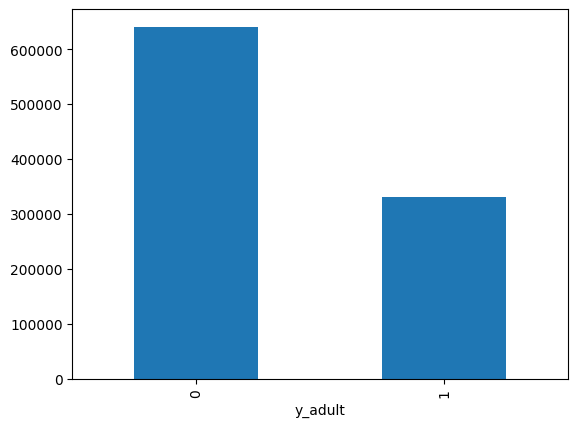

In [73]:
tad_1['y_adult'].value_counts().plot(kind='bar')
plt.show()

In [77]:
tad_1.shape

(972506, 13)

In [80]:
tad_1.to_parquet('../data/output/BLAS_DURAN_GUSTAVO_T4.parquet')